In [1]:
import matplotlib.pyplot as plt
import pandas as pd

#plt.style can be used to change the style of the graph
plt.style.available  #display a list of the available styles
plt.style.use('fivethirtyeight')  #use the chosen color style

# Video 1: Creating Simple Plots

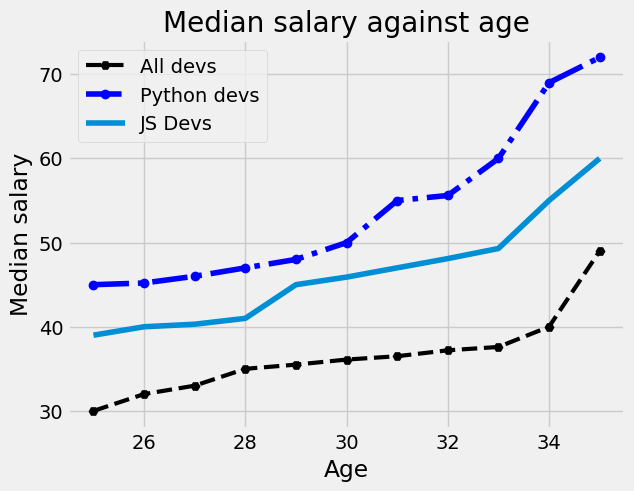

In [7]:
# we will first create a very basic graph showing the ages of devs against their salaries

dev_x = list(range(25, 36))

# we can add legends to the plot if we're gonna plot multiple plots on the same graph using label= attribute
# we can add marker, change line color or change line style by passing an additional arg to plot(x, y, '')
# color and line style codes can be found at https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
# The line formatting is in the form [color][linestyle][marker]
# Line width can be specified by the linewidth argument. Default is 1
dev_y = [30, 32, 33, 35, 35.5, 36.1, 36.5, 37.2, 37.6, 40, 49]
plt.plot(dev_x, dev_y, 'k--H', linewidth=3, label='All devs') 

# If you run plt.plot() again before plt.show(), both plots will appear on the same graph
dev_py_y = [45, 45.2, 46, 47, 48, 50, 55, 55.6, 60, 69, 72]
plt.plot(dev_x, dev_py_y, 'b-.o', label='Python devs')

dev_js_y = [39, 40, 40.3, 41, 45, 45.9, 47, 48.1, 49.3, 55, 60]
plt.plot(dev_x, dev_js_y, label='JS Devs')

# Adding labels and titles. Any addons must be added befor plt.show()
plt.title('Median salary against age')
plt.xlabel('Age')
plt.ylabel('Median salary')

plt.legend() #this must be called to enable legend
#plt.grid()  #enable grid view

#plt.savefig('PATH.png') use this line to save the figure

plt.show()

# Video 2: Bar Charts

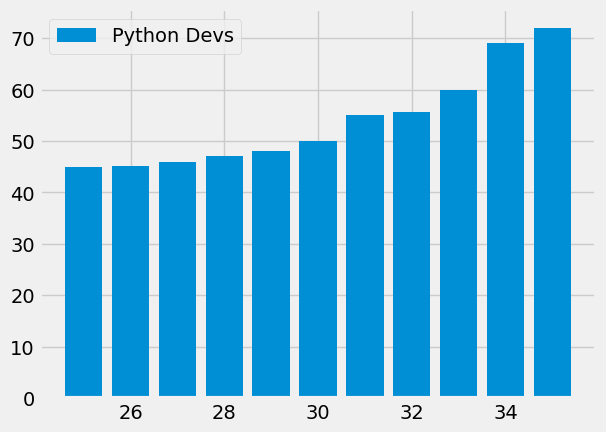

In [3]:
# plt.plot() function plots a line chart by defualt
# to plot a bar chart, you need to use plt.bar()
plt.bar(dev_x, dev_py_y, label='Python Devs')

plt.legend()
plt.show()

# this is the way of plotting one data set

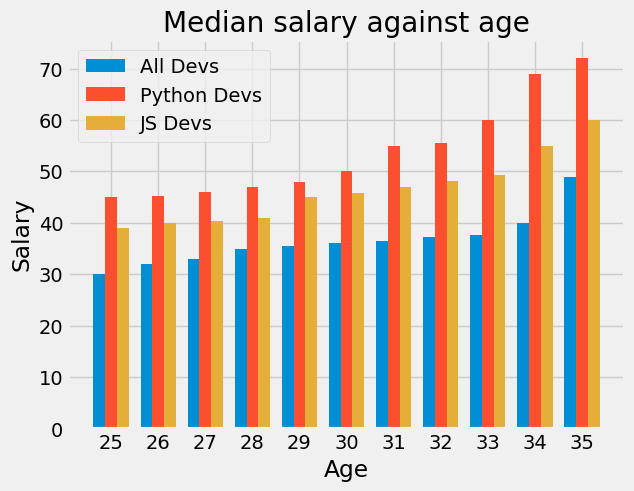

In [4]:
# now what if we want to plot the bar charts of the 3 dev categories on the same graph?
# we will need numpy for this
import numpy as np

x_idx = np.arange(len(dev_x)) #you will find out why soon

#next we will need to change the width of each bar so that the 3 categories fit the graph
width = .25 #the default bar width is 0.8

#now instead of plotting the ages on the x axis, we will plot the x_idx, then we will label them with the ages via xticks() method
#the bar will have to be offset by the bar width so that we can stack the 3 bars next to each other
# we will also have to reduce the width of the bar using the width attribute
plt.bar(x_idx - width, dev_y, width=width, label='All Devs')
plt.bar(x_idx, dev_py_y, width=width, label='Python Devs')
plt.bar(x_idx + width, dev_js_y, width=width, label='JS Devs')

plt.xticks(ticks=x_idx, labels=dev_x) #we now label the x_idx with the ages

plt.title('Median salary against age')
plt.xlabel('Age')
plt.ylabel('Salary')

#plt.xticks()

plt.legend()
plt.show()


In [8]:
# task: the data.csv file contains the stackoverflow responses of the most commonly used programming languages. visualize this data using a bar chart

import pandas as pd
from collections import Counter

data = pd.read_csv('data1.csv', index_col='Responder_id')

c = Counter()

languages = []
popularity = []
for langs in data['LanguagesWorkedWith']:
    c.update(langs.split(';'))

for lang, cnt in sorted(c.items(), key=lambda x: x[1], reverse=True):
    languages.append(lang)
    popularity.append(cnt)


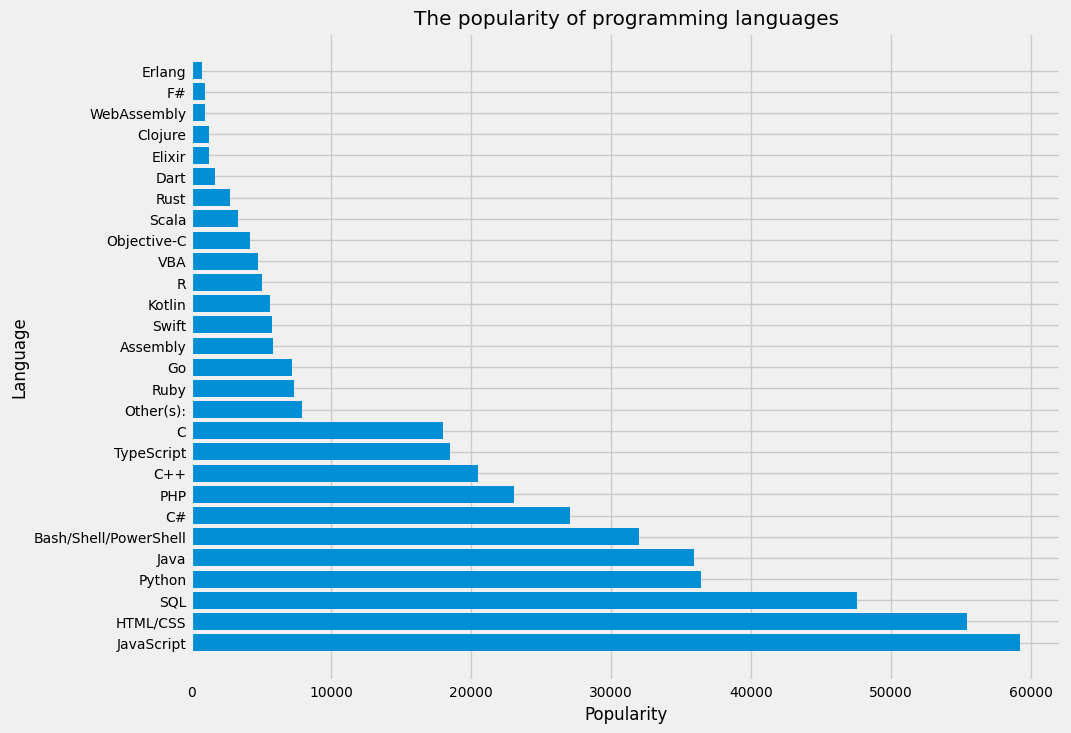

In [76]:
plt.figure(figsize=(10, 8))
plt.barh(languages, popularity)
plt.xlabel('Popularity')
plt.ylabel('Language')
plt.title('The popularity of programming languages')
plt.show()

# Video 3: Pie Charts

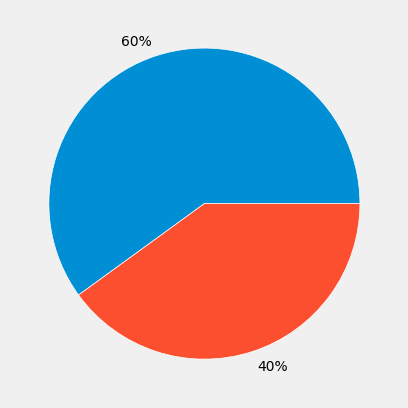

In [82]:
# creating a very simple pie chart
# pie charts are not very good when there is too much data. 5 or 6 categories are enough.

slices = [60, 40]
labels = ['60%', '40%']

plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'white'})
plt.show()

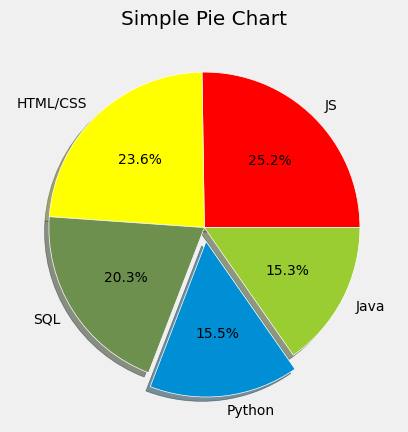

In [104]:
slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JS', 'HTML/CSS', 'SQL', 'Python', 'Java']
colors = ['red', 'yellow', '#6d904f', '#008fd5', '#9acd32']
explode = [0, 0, 0, 0.09, 0]

plt.pie(slices, 
        labels=labels, 
        colors=colors, 
        wedgeprops={'edgecolor': 'white'},
        explode=explode,
        autopct='%1.1f%%',
        shadow=True)

plt.title('Simple Pie Chart')
plt.show()

# Video 4: Stack Plots

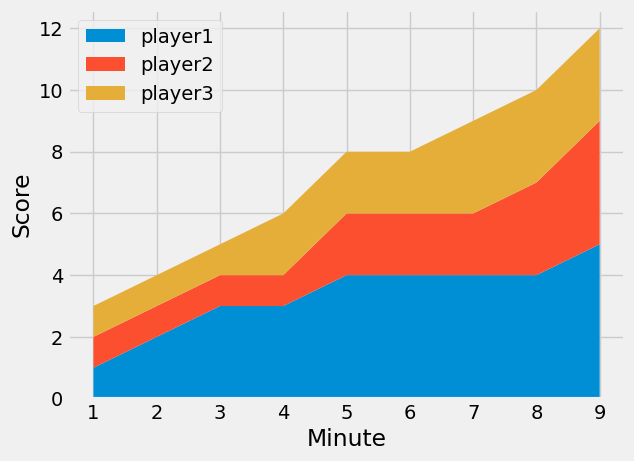

In [5]:
# Stackplot is used to draw a stacked area plot. It displays the complete data for visualization. It shows each part stacked onto one another and how each part 
# makes the complete figure. It displays various constituents of data and it behaves like a pie chart. 

# example: make a stack plot that keeps track of the scores of 3 players over 9 minutes
minutes = list(range(1, 10))

player1 = [1, 2, 3, 3, 4, 4, 4, 4, 5]
player2 = [1, 1, 1, 1, 2, 2, 2, 3, 4]
player3 = [1, 1, 1, 2, 2, 2, 3, 3, 3]

labels = ['player1', 'player2', 'player3']

plt.stackplot(minutes, player1, player2, player3, labels=labels)

plt.legend(loc='upper left')
plt.xlabel('Minute')
plt.ylabel('Score')
plt.show()

# Video 5: Filling Areas in Line Plots

In [14]:
data = pd.read_csv('data2.csv')

ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']


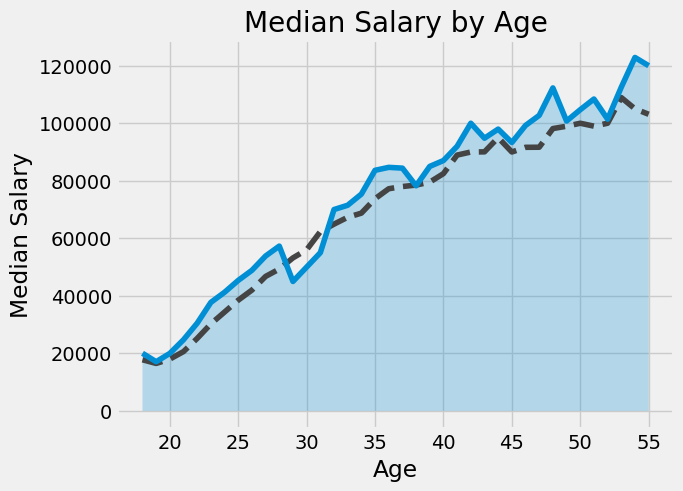

In [15]:
# fill the area between py devs and 0
plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
plt.plot(ages, py_salaries)

# fill between the curve of py devs and the x axis
plt.fill_between(ages, py_salaries, alpha=.25)  #alpha is the transparency

plt.title('Median Salary by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary')
plt.show()

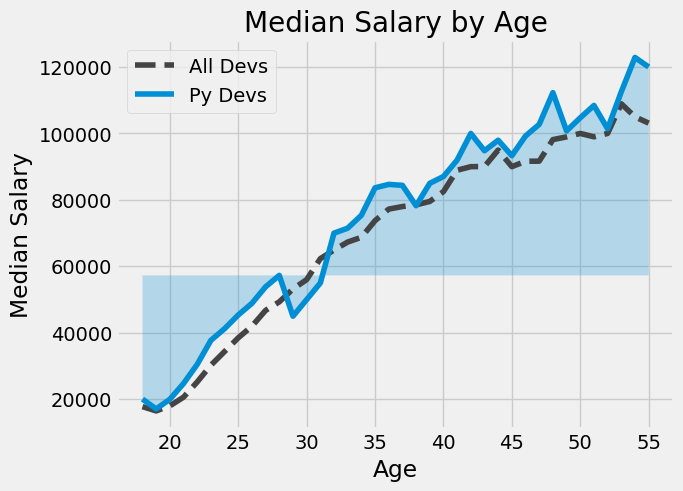

In [18]:
# fill between py devs and the median salary 57287

plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Py Devs')

# fill between the curve of py devs and the x axis
plt.fill_between(ages, py_salaries, 57287, alpha=.25)  #alpha is the transparency

plt.legend()
plt.title('Median Salary by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary')
plt.show()

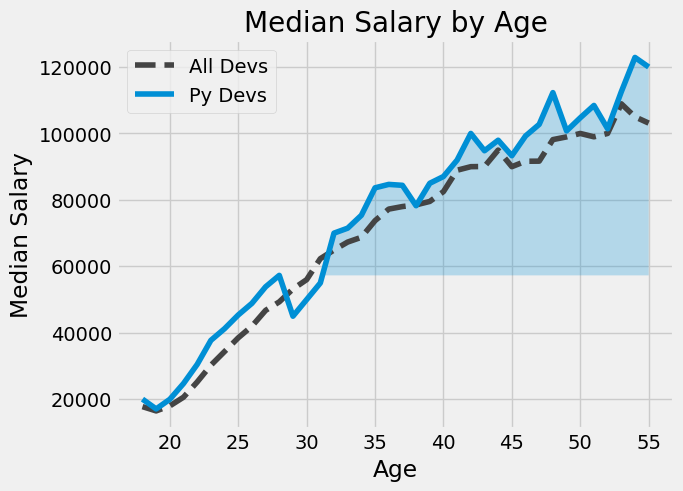

In [22]:
# fill the area only above 57287

plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Py Devs')

plt.fill_between(ages, py_salaries, 57287, 
                 where=(py_salaries > 57287),
                 interpolate=True,  #this will prevent certain areas to be clipped
                 alpha=.25)  #alpha is the transparency

plt.legend()
plt.title('Median Salary by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary')
plt.show()

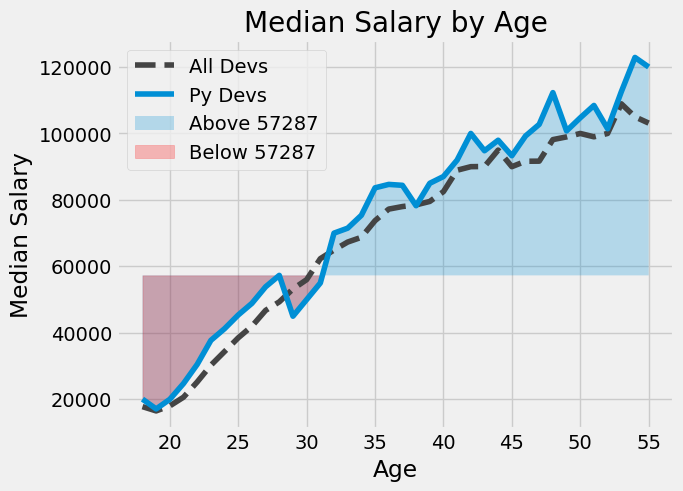

In [27]:
# set the color of the area above 57287 to green and the area below to red

plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Py Devs')

plt.fill_between(ages, py_salaries, 57287,
                 alpha=.25, #alpha is the transparency
                 label='Above 57287')  #labelling the filled area
plt.fill_between(ages, py_salaries, 57287, 
                 where=(py_salaries <= 57287), 
                 interpolate=True,
                 color='red', 
                 alpha=.25,
                 label='Below 57287')

plt.legend()
plt.title('Median Salary by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary')
plt.show()

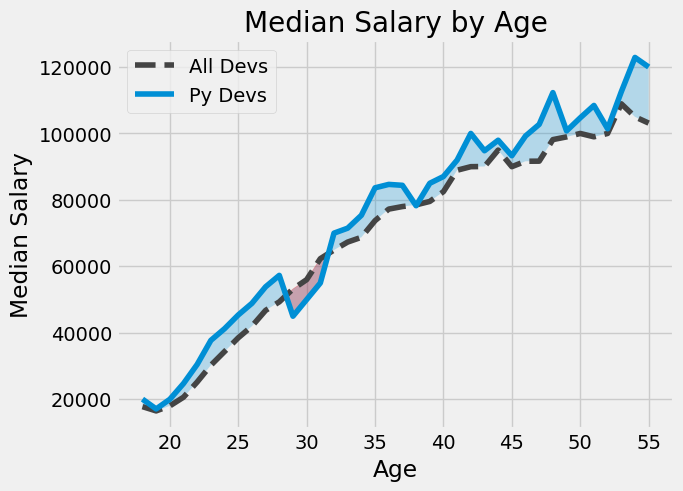

In [26]:
# fill the area between the 2 curves. the area when py curve is above
# the dev curve should be in one color and the area below should be in
# another

plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Py Devs')

plt.fill_between(ages, py_salaries, dev_salaries, alpha=.25)  #alpha is the transparency
plt.fill_between(ages, py_salaries, dev_salaries, 
                 where=(py_salaries <= dev_salaries), 
                 interpolate=True,
                 color='red', 
                 alpha=.25)

plt.legend()
plt.title('Median Salary by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary')
plt.show()

# Video 6: Histograms

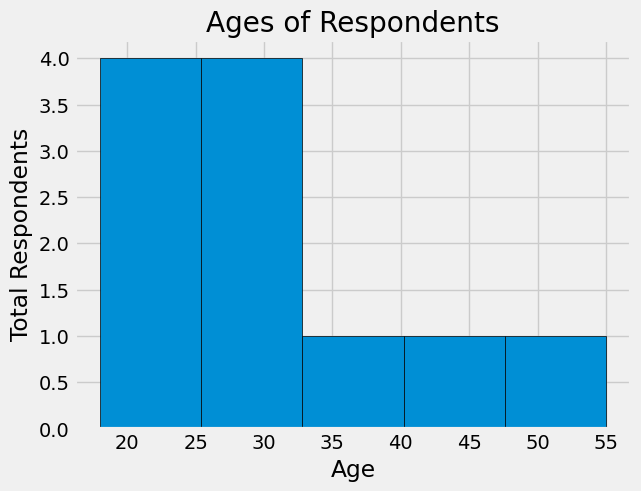

In [6]:
# Histograms are useful when you want to plot ranges of data. For example, you want to know the total number of respondents to a survey that fall
# between the ages 20 to 25, 25 to 30 and 30 to 40. These are the bins of the histogram

ages = [18, 19, 21, 25, 26, 26, 30, 32, 38, 45, 55]

plt.hist(ages, bins=5, edgecolor='black') # bins = 5 means divide the data into 5 ranges

plt.title('Ages of Respondents')
plt.xlabel('Age')
plt.ylabel('Total Respondents')

plt.show()

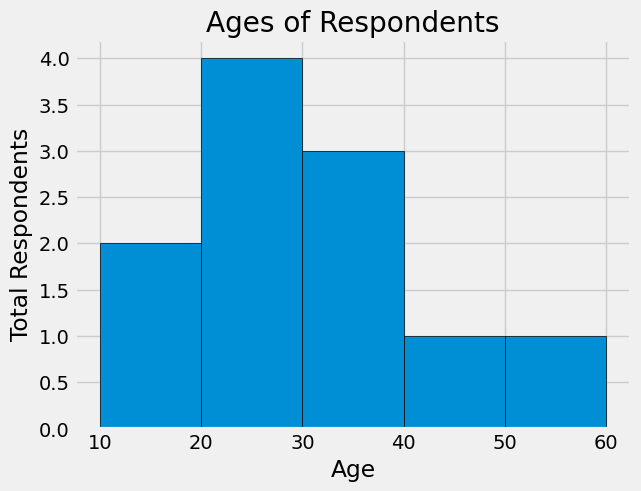

In [11]:
# you can specify your own ranges
bins = [10, 20, 30, 40, 50, 60] # 10 to 20, 20 to 30, 30 to 40, ....

plt.hist(ages, bins=bins, edgecolor='black') # bins = 5 means divide the data into 5 ranges

plt.title('Ages of Respondents')
plt.xlabel('Age')
plt.ylabel('Total Respondents')
plt.show()

#we can see that from 10 to 20 we have 2 respondents, from 20 to 30 we have 4, ...

In [42]:
df = pd.read_csv('data3.csv')
age = df['Age']
id = df['Responder_id']

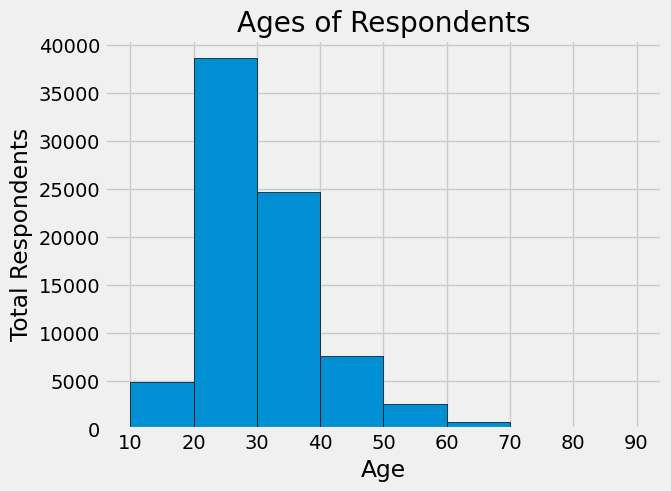

In [44]:
bins = [10, 20, 30, 40, 50, 60, 70, 80,90]

plt.hist(age, bins=bins, edgecolor='black')
plt.title('Ages of Respondents')
plt.xlabel('Age')
plt.ylabel('Total Respondents')
plt.show()

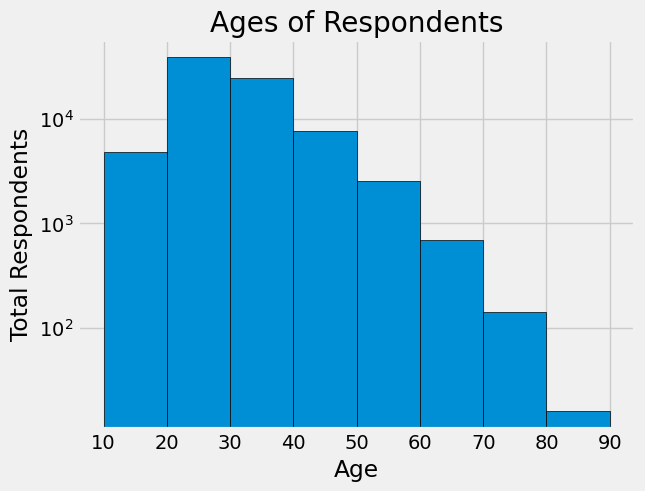

In [46]:
bins = [10, 20, 30, 40, 50, 60, 70, 80,90]

plt.hist(age, bins=bins, edgecolor='black', log=True) # log=true: plot the data on a logarithmic scale
plt.title('Ages of Respondents')
plt.xlabel('Age')
plt.ylabel('Total Respondents')
plt.show()

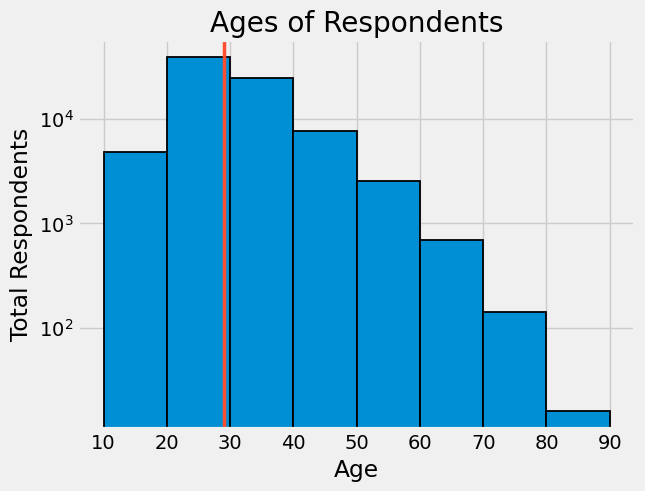

In [58]:
# you can plot a vertical line in the graph to clarify more info
# make a vertical line at the median age

bins = [10, 20, 30, 40, 50, 60, 70, 80,90]

median = age.median()
plt.axvline(median, color='#fc4f30', linewidth=2.5)

plt.hist(age, bins=bins, edgecolor='black', log=True, linewidth=1.3) # log=true: plot the data on a logarithmic scale
plt.title('Ages of Respondents')
plt.xlabel('Age')
plt.ylabel('Total Respondents')
plt.show()

# Video 7: Scatter Plots

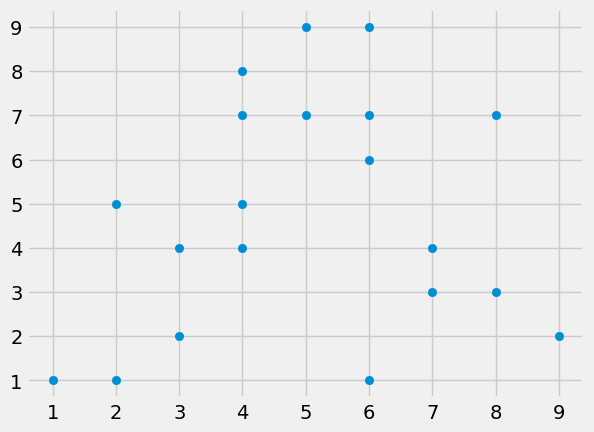

In [61]:
# scatter plots are used when you want to show the relationship between 
# 2 sets of values and see how they are correlated like seeing how 
# salaries are correlated with age. It can also be used to spot outliers

# we want to see how x and y are correlated
x = [5, 7, 8, 5, 6, 7, 9, 2, 3, 4, 4, 4, 2, 6, 3, 6, 8, 6, 4, 1]
y = [7, 4, 3, 9, 1, 3, 2, 5, 2, 4, 8, 7, 1, 6, 4, 9, 7, 7, 5, 1]

plt.scatter(x, y)
plt.show()
#totally random

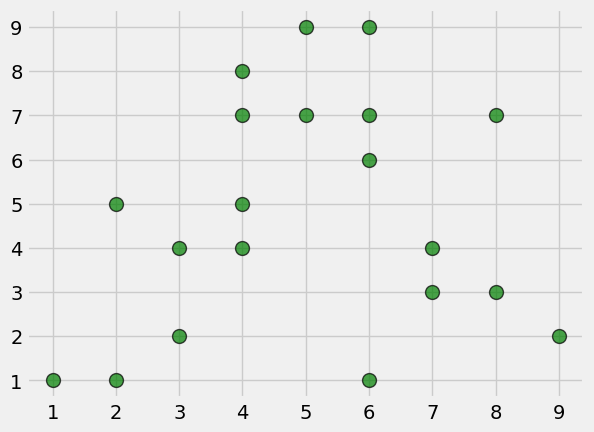

In [77]:
# change the size, color and shape of the markers

plt.scatter(x, y, s=100, c='green', marker='o', 
            edgecolor='black', linewidth=1,
            alpha=.70)
plt.show()

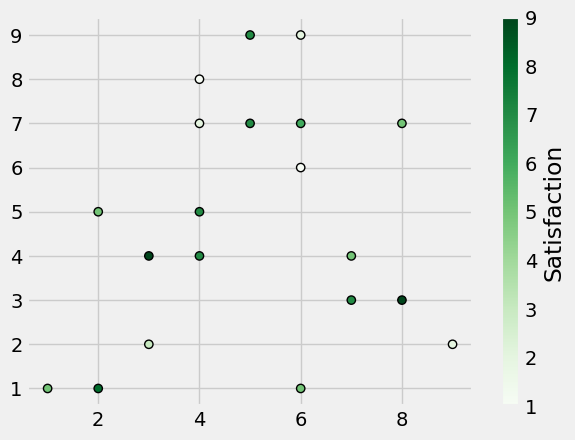

In [85]:
# suppose you have more that 1 dataset and you want to give color and size to each dataset

x = [5, 7, 8, 5, 6, 7, 9, 2, 3, 4, 4, 4, 2, 6, 3, 6, 8, 6, 4, 1]
y = [7, 4, 3, 9, 1, 3, 2, 5, 2, 4, 8, 7, 1, 6, 4, 9, 7, 7, 5, 1]

colors = [7, 5, 9, 7, 5, 7, 2, 5, 3, 7, 1, 2, 8, 1, 9, 2, 5, 6, 7, 5]
# each of these values will correspond to a point in the x, y variables

plt.scatter(x, y, c=colors, cmap='Greens', edgecolor='black', linewidth=1) #shades of green

# but now you don't know what each shade of green correponds to what value.
# so we will add a color map legend
cbar = plt.colorbar()
cbar.set_label('Satisfaction')

plt.show()

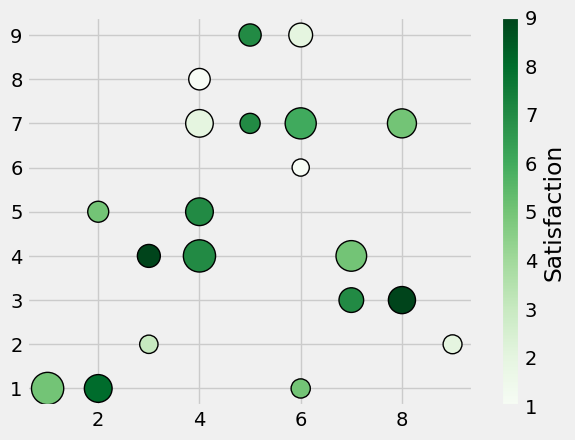

In [87]:
# give higher different values of satisfaction a different marker size

x = [5, 7, 8, 5, 6, 7, 9, 2, 3, 4, 4, 4, 2, 6, 3, 6, 8, 6, 4, 1]
y = [7, 4, 3, 9, 1, 3, 2, 5, 2, 4, 8, 7, 1, 6, 4, 9, 7, 7, 5, 1]

colors = [7, 5, 9, 7, 5, 7, 2, 5, 3, 7, 1, 2, 8, 1, 9, 2, 5, 6, 7, 5]
# each of these values will correspond to a point in the x, y variables
sizes = [209, 486, 381, 255, 191, 315, 185, 228, 174,
         538, 239, 394, 399, 153, 273, 293, 436, 501, 397, 539]
# give point (5, 7) color of '7' and size of 209 and so on

plt.scatter(x, y, c=colors, s=sizes, cmap='Greens', edgecolor='black', linewidth=1) #shades of green

# but now you don't know what each shade of green correponds to what value.
# so we will add a color map legend
cbar = plt.colorbar()
cbar.set_label('Satisfaction')

In [88]:
# given the dataset data4.csv of youtube trending videos, find the correlation
# between the number of views and the likes count

data = pd.read_csv('data4.csv')
data.head()

,view_count,likes,ratio
0,8036001,324742,96.91
1,9378067,562589,98.19
2,2182066,273650,99.38
3,6525864,94698,96.25
4,9481284,582481,97.22


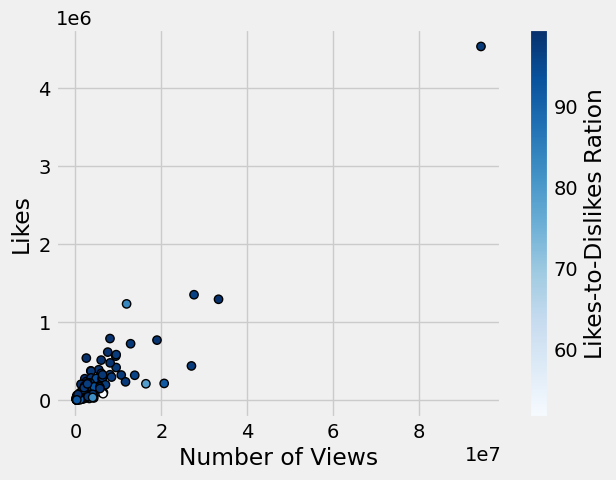

In [111]:
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

plt.scatter(view_count, likes, cmap='Blues', c=ratio,
            edgecolor='black', linewidth=1)

cbar = plt.colorbar()
cbar.set_label('Likes-to-Dislikes Ration')
plt.xlabel('Number of Views')
plt.ylabel('Likes')
plt.show()

# notice how one outlier messes up the plot. so it is better to use a log
# scale for x and y

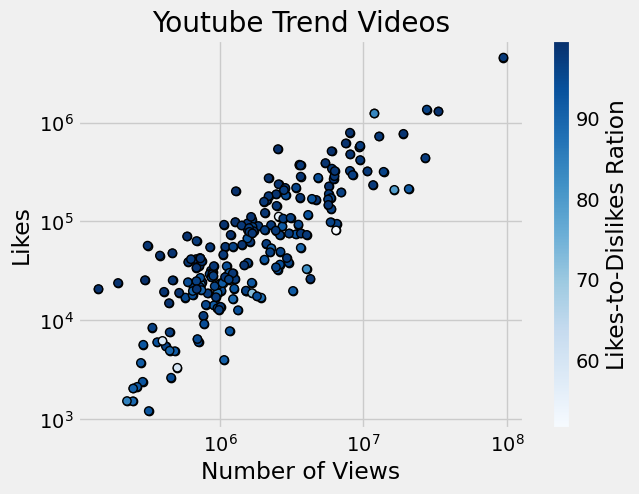

In [120]:
plt.scatter(view_count, likes, edgecolor='black', linewidth=1)

plt.scatter(view_count, likes, cmap='Blues', c=ratio,
            edgecolor='black', linewidth=1)

cbar = plt.colorbar()
cbar.set_label('Likes-to-Dislikes Ration')
plt.xscale('log')
plt.yscale('log')
plt.title('Youtube Trend Videos')
plt.xlabel('Number of Views')
plt.ylabel('Likes')
plt.show()

# Video 8: Plotting Time Series Data

In [13]:
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates  ##will be used to change the date formats
 
dates = [
    datetime(2019, 5, 24),
    datetime(2019, 5, 25),
    datetime(2019, 5, 26),
    datetime(2019, 5, 27),
    datetime(2019, 5, 28),
    datetime(2019, 5, 29),
    datetime(2019, 5, 30)
]

y = [0, 1, 3, 4, 6, 5, 7]

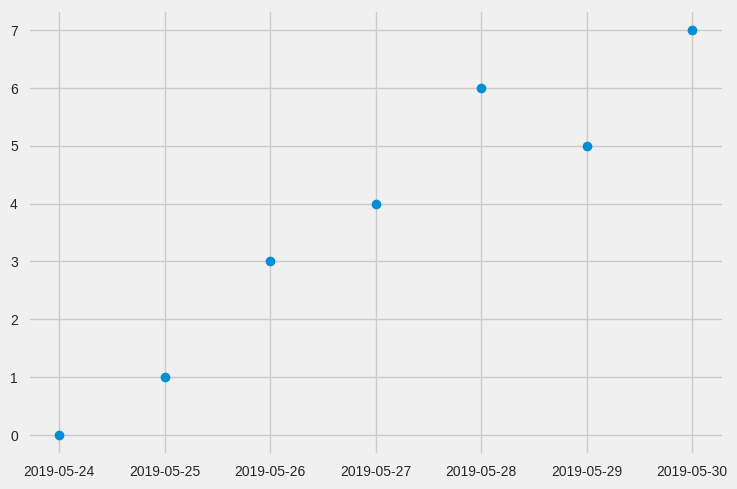

In [14]:
# this will plot the data as scattered

plt.plot_date(dates, y)
plt.show()

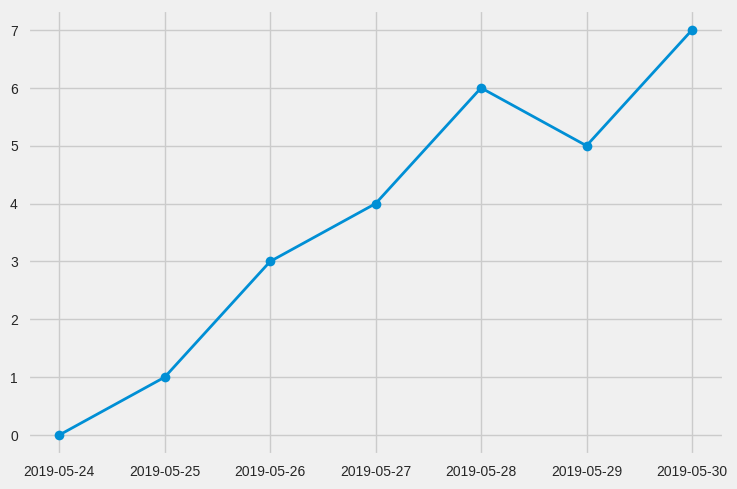

In [18]:
# you can plot them as connected using linestyle='solid'

plt.plot_date(dates, y, linestyle='solid', linewidth=2)
plt.show()

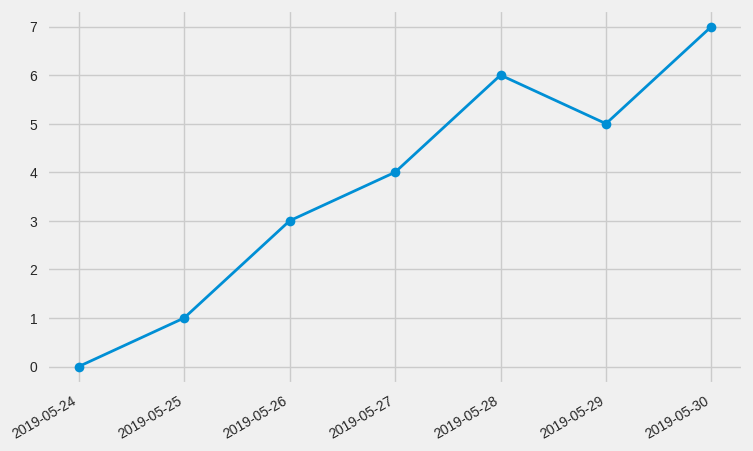

In [21]:
# adding some formatting to the dates axis

plt.plot_date(dates, y, linestyle='solid', linewidth=2)
plt.gcf().autofmt_xdate()
plt.show()

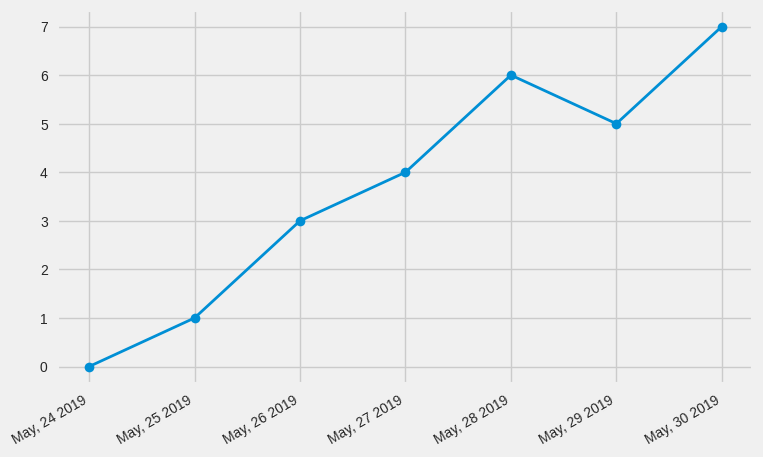

In [24]:
# now what if you need to change the format of the dates?

plt.plot_date(dates, y, linestyle='solid', linewidth=2)
plt.gcf().autofmt_xdate()

date_format = mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)
#get current axis

plt.show()
 

In [49]:
data = pd.read_csv('data5.csv')
dates = data['Date']
close = data['Close']

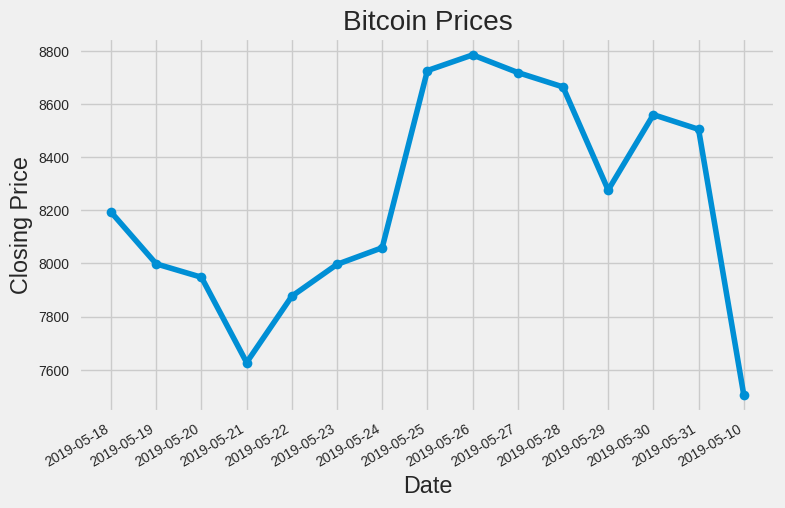

In [50]:
plt.plot_date(dates, close, linestyle='solid')

plt.gcf().autofmt_xdate()

plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

#Caution: the dates are now plotted as strings not dates
#if we add a new date to the csv file, it will look like this:

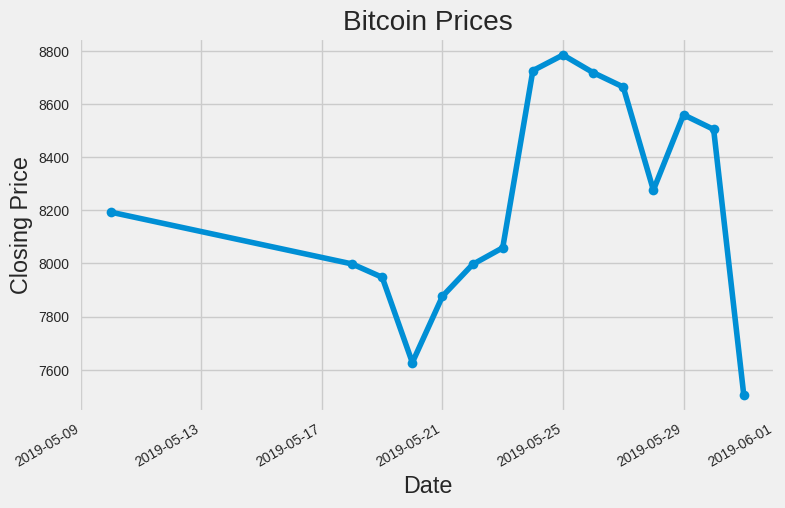

In [53]:
dates = pd.to_datetime(dates)
dates = dates.sort_values()
plt.plot_date(dates, close, linestyle='solid')

plt.gcf().autofmt_xdate()

plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

#the date that we added to the end of the csv file is now placed in the right place

# Video 9: Plotting Live Data in Real-Time

In [2]:
# This kind of plots is useful when you need to generate data in real time
# like, for example, plotting youtube subscriber counts and updating the
# graph with each new subscriber. It is also useful in cases where you
# want to monitor a sensor and plot the results instantly.